# groupby()
## Groupby => 동일한 데이터별로 데이터를 묶는다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = {'Team':['Riders','Riders','Devils', 'Devils', 'Kings','Giant','Kings','Kings','Riders', 'Royals', 'Royals', 'Riders'],\
       'Rank':[1,2,2,3,3,4,1,1,2,4,1,2], 'Year':[2014,2015, 2014,2015, 2014,2015,2016,2017,2016, 2014,2015,2017],\
       'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
data

{'Team': ['Riders',
  'Riders',
  'Devils',
  'Devils',
  'Kings',
  'Giant',
  'Kings',
  'Kings',
  'Riders',
  'Royals',
  'Royals',
  'Riders'],
 'Rank': [1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2],
 'Year': [2014,
  2015,
  2014,
  2015,
  2014,
  2015,
  2016,
  2017,
  2016,
  2014,
  2015,
  2017],
 'Points': [876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690]}

In [8]:
df = pd.DataFrame(data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Giant,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [27]:
#Devils의 포인트 평균
df[df['Team']=='Devils']['Points'].mean()

768.0

In [31]:
# 팀별 포인트 평균
df.groupby('Team')['Points'].mean()

Team
Devils    768.000000
Giant     812.000000
Kings     761.666667
Riders    762.250000
Royals    752.500000
Name: Points, dtype: float64

In [42]:
# 팀별로 묶인 그룹 생성
gr1 = df.groupby('Team')
gr1.get_group('Kings')

,Team,Rank,Year,Points
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788


In [43]:
# 그룹에 함수 적용
gr1.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Giant,4.000000,2015.000000,812.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000


In [44]:
# 특정 컬럼에만 함수 적용
gr1.agg({'Points':np.mean})

,Points
Team,
Devils,768.000000
Giant,812.000000
Kings,761.666667
Riders,762.250000
Royals,752.500000


In [51]:
# 팀별로 몇개씩의 데이터가 있는가?
# 팀별 최고 랭킹?
print(df.groupby('Team')['Team'].count())
print(df.groupby('Team')['Rank'].min())

Team
Devils    2
Giant     1
Kings     3
Riders    4
Royals    2
Name: Team, dtype: int64
Team
Devils    2
Giant     4
Kings     1
Riders    1
Royals    1
Name: Rank, dtype: int64


In [54]:
gr1.agg({'Rank':len})

,Rank
Team,
Devils,2
Giant,1
Kings,3
Riders,4
Royals,2


In [59]:
df = pd.read_csv('./csvfiles/phone_data.csv')
df

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


# info() 데이터프레임의 갯수, null값 유무 등 간략한 구성 정보들을 가져온다

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
index           830 non-null int64
date            830 non-null object
duration        830 non-null float64
item            830 non-null object
month           830 non-null object
network         830 non-null object
network_type    830 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 45.5+ KB


# describe() 데이터 프레임의 갯수, 평균등 간략한 정보들을 가져온다.

In [62]:
df.describe()

,index,duration
count,830.000000,830.000000
mean,414.500000,117.804036
std,239.744656,444.129560
min,0.000000,1.000000
25%,207.250000,1.000000
50%,414.500000,24.500000
75%,621.750000,55.000000
max,829.000000,10528.000000


# head(x) 앞쪽 x 개의 데이터를 가져온다. 기본5

In [63]:
df.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


# tail(x) 뒤쪽 x 개의 데이터를 가져온다. 기본5

In [64]:
df.tail()

,index,date,duration,item,month,network,network_type
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world
829,829,14/03/15 00:16,1.000,sms,2015-03,world,world


In [67]:
df['item'].unique()

array(['data', 'call', 'sms'], dtype=object)

In [69]:
# 아이템별 사용 시간의 평균

print(df.groupby('item')['duration'].mean())
print(df.groupby('item')['duration'].sum())

item
call    237.940722
data     34.429000
sms       1.000000
Name: duration, dtype: float64
item
call    92321.00
data     5164.35
sms       292.00
Name: duration, dtype: float64


In [87]:
# call data의 월별 사용시간의 합계
# 1. call data 추출
# 2. call data를 월별로 묶어줌
# 3. 사용시간 합

df[df['item']=='call'].groupby('month')['duration'].sum()

month
2014-11    25547.0
2014-12    13561.0
2015-01    17070.0
2015-02    14416.0
2015-03    21727.0
Name: duration, dtype: float64

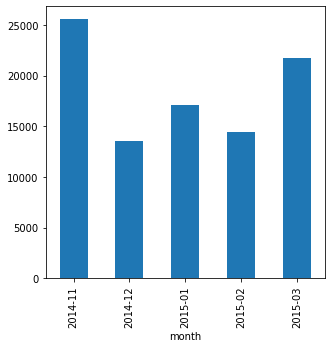

In [91]:
plt.figure(figsize=(5,5))
df[df['item']=='call'].groupby('month')['duration'].sum().plot(kind='bar')

In [92]:
# 통신사별 이용건수

In [95]:
df.groupby('network')['date'].count()

network
Meteor        87
Tesco         84
Three        215
Vodafone     215
data         150
landline      42
special        3
voicemail     27
world          7
Name: date, dtype: int64

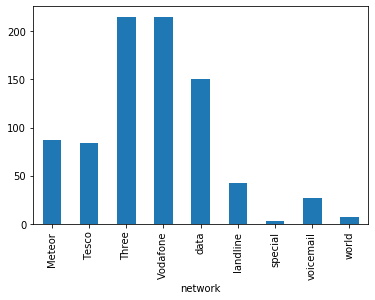

In [94]:
df.groupby('network')['date'].count().plot(kind='bar')

# 시간대별 이용건수
# 시간대별 평균이용시간

## 1. 시간대를 뽑아낸다. -> df['컬럼명'].values[i].split()[1][:2]
## 2. 뽑아낸 시간대를 리스트로 저장한다. -> for문
## 3. 저장한 리스트를 데이터프레임에 컬럼으로 추가한다.
## 4. 추가한 컬럼으로 묶는다. -> groupby()
## 5. 묶은 데이터로 계산

In [129]:
df.head(3)

,index,date,duration,item,month,network,network_type,hour
0,0,15/10/14 06:58,34.429,data,2014-11,data,data,06
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,06
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,14


In [128]:
temp = []
for t in df['date']:
    temp.append(t.split()[1][:2])


df['hour'] = temp

print(df.groupby('hour')['date'].count())
print(df.groupby('hour')['duration'].mean())
#df['date'].values[0].split()[1][:2]

hour
00     10
01      7
02      5
06    151
07      7
08     18
09     38
10     37
11     43
12     49
13     52
14     56
15     37
16     45
17     57
18     61
19     47
20     34
21     30
22     27
23     19
Name: date, dtype: int64
hour
00     23.600000
01      1.285714
02     56.600000
06     34.287086
07      3.285714
08    109.555556
09     95.947368
10     75.459459
11    102.953488
12    262.224490
13    151.480769
14     96.071429
15    224.513514
16    221.177778
17    135.350877
18    159.737705
19    196.042553
20    161.147059
21     52.800000
22      2.444444
23     54.947368
Name: duration, dtype: float64


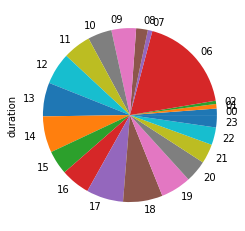

In [131]:
df.groupby('hour')['duration'].count().plot(kind='pie')
plt.savefig('Duration_time.jpg')

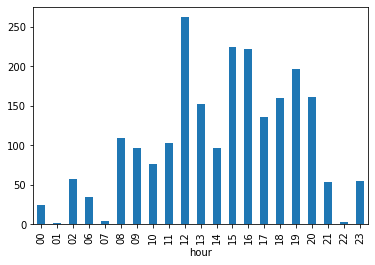

In [126]:
df.groupby('hour')['duration'].mean().plot(kind='bar')

# multi_groupby => multi index, Hireachical index

In [136]:
df.groupby(['month','item'])['duration'].sum()

month    item
2014-11  call    25547.000
         data      998.441
         sms        94.000
2014-12  call    13561.000
         data     1032.870
         sms        48.000
2015-01  call    17070.000
         data     1067.299
         sms        86.000
2015-02  call    14416.000
         data     1067.299
         sms        39.000
2015-03  call    21727.000
         data      998.441
         sms        25.000
Name: duration, dtype: float64

In [139]:
df.groupby(['month','item'])['duration'].sum().unstack()

item,call,data,sms
month,,,
2014-11,25547.0,998.441,94.0
2014-12,13561.0,1032.870,48.0
2015-01,17070.0,1067.299,86.0
2015-02,14416.0,1067.299,39.0
2015-03,21727.0,998.441,25.0


In [137]:
df.groupby(['item','month'])['duration'].sum()

item  month  
call  2014-11    25547.000
      2014-12    13561.000
      2015-01    17070.000
      2015-02    14416.000
      2015-03    21727.000
data  2014-11      998.441
      2014-12     1032.870
      2015-01     1067.299
      2015-02     1067.299
      2015-03      998.441
sms   2014-11       94.000
      2014-12       48.000
      2015-01       86.000
      2015-02       39.000
      2015-03       25.000
Name: duration, dtype: float64

In [138]:
df.groupby(['item','month'])['duration'].mean().unstack()

month,2014-11,2014-12,2015-01,2015-02,2015-03
item,,,,,
call,238.757009,171.658228,193.977273,215.164179,462.276596
data,34.429000,34.429000,34.429000,34.429000,34.429000
sms,1.000000,1.000000,1.000000,1.000000,1.000000


# apply()

In [160]:
df = pd.DataFrame({'a':[10,20,30], 'b':[20,30,40], 'c':[50,60,70]})
df

,a,b,c
0,10,20,50
1,20,30,60
2,30,40,70


In [149]:
df['a'] = [int(i/10) for i in df['a']]
df

,a,b,c
0,1,20,50
1,2,30,60
2,3,40,70


In [154]:
def div10(x):
    return int(x/10)
df['a'].apply(div10)

0    1
1    2
2    3
Name: a, dtype: int64

In [155]:
def div5(x):
    return int(x/5)
df['c'] = df['c'].apply(div5)
df

,a,b,c
0,10,20,10
1,20,30,12
2,30,40,14


# lambda x : 
# &nbsp;&nbsp;&nbsp;&nbsp;실행문

In [161]:
df['c'] = df['c'].apply(lambda x: int(x/5)) 
df

,a,b,c
0,10,20,10
1,20,30,12
2,30,40,14


In [163]:
pdf = pd.read_csv('./csvfiles/phone_data.csv')
pdf

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


In [168]:
pdf['hour'] = pdf['date'].apply(lambda x: x[-5:-3])
pdf

,index,date,duration,item,month,network,network_type,hour
0,0,15/10/14 06:58,34.429,data,2014-11,data,data,06
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,06
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,14
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,14
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,17
...,...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world,00
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile,00
827,827,13/03/15 06:58,34.429,data,2015-03,data,data,06
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world,00


In [170]:
pdf['year'] = pdf['date'].apply(lambda x: x[:2])
pdf

,index,date,duration,item,month,network,network_type,hour,year
0,0,15/10/14 06:58,34.429,data,2014-11,data,data,06,15
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,06,15
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,14,15
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,14,15
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,17,15
...,...,...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world,00,13
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile,00,13
827,827,13/03/15 06:58,34.429,data,2015-03,data,data,06,13
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world,00,14


In [176]:
def yearf(x):
    return x.split('-')[0]
pdf['yearf'] = pdf['month'].apply(yearf)
pdf.head(3)

,index,date,duration,item,month,network,network_type,hour,year,yearf
0,0,15/10/14 06:58,34.4,data,2014-11,data,data,06,15,2014
1,1,15/10/14 06:58,13.0,call,2014-11,Vodafone,mobile,06,15,2014
2,2,15/10/14 14:46,23.0,call,2014-11,Meteor,mobile,14,15,2014


In [175]:
pdf['duration'] = pdf['duration'].apply(lambda x: round(x,1))
pdf

,index,date,duration,item,month,network,network_type,hour,year
0,0,15/10/14 06:58,34.4,data,2014-11,data,data,06,15
1,1,15/10/14 06:58,13.0,call,2014-11,Vodafone,mobile,06,15
2,2,15/10/14 14:46,23.0,call,2014-11,Meteor,mobile,14,15
3,3,15/10/14 14:48,4.0,call,2014-11,Tesco,mobile,14,15
4,4,15/10/14 17:27,4.0,call,2014-11,Tesco,mobile,17,15
...,...,...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.0,sms,2015-03,world,world,00,13
826,826,13/03/15 00:39,1.0,sms,2015-03,Vodafone,mobile,00,13
827,827,13/03/15 06:58,34.4,data,2015-03,data,data,06,13
828,828,14/03/15 00:13,1.0,sms,2015-03,world,world,00,14


# DataFrame 합치기
## 1. merge => join
## 2. concat => 붙이기

In [179]:
rdata = {
    'subject_id':['1','2','3','4','5','7','8','9','10','11','12'],
    'test_score':[51,15,15,61,16,14,14,61,16,51, 16]
}
df1 = pd.DataFrame(rdata)
df1

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,14
7,9,61
8,10,16
9,11,51


In [180]:
rdata2 = {
    'subject_id':['4','5','6','7','8'],
    'first_name':['Billy','Brian','Bran','Bryce','Betty'],
    'last_name':['Bonder','Black','Balwner','Brice','Btisan']
}
df2 = pd.DataFrame(rdata2)
df2

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [181]:
print(df1)
print(df2)

   subject_id  test_score
0           1          51
1           2          15
2           3          15
3           4          61
4           5          16
5           7          14
6           8          14
7           9          61
8          10          16
9          11          51
10         12          16
  subject_id first_name last_name
0          4      Billy    Bonder
1          5      Brian     Black
2          6       Bran   Balwner
3          7      Bryce     Brice
4          8      Betty    Btisan


# 교집합만 결합

In [182]:
pd.merge(df1, df2, on='subject_id', how='inner')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,14,Betty,Btisan


# 오른쪽 기준

In [185]:
pd.merge(df1, df2, on='subject_id', how='right')

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,7,14.0,Bryce,Brice
3,8,14.0,Betty,Btisan
4,6,NaN,Bran,Balwner


# 왼쪽 기준

In [186]:
pd.merge(df1, df2, on='subject_id', how='left')

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,14,Betty,Btisan
7,9,61,NaN,NaN
8,10,16,NaN,NaN
9,11,51,NaN,NaN


# 전체합

In [190]:
pd.merge(df1, df2, on='subject_id', how='outer')

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,14.0,Betty,Btisan
7,9,61.0,NaN,NaN
8,10,16.0,NaN,NaN
9,11,51.0,NaN,NaN


In [191]:
pd.concat([df1,df2])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,first_name,last_name,subject_id,test_score
0,NaN,NaN,1,51.0
1,NaN,NaN,2,15.0
2,NaN,NaN,3,15.0
3,NaN,NaN,4,61.0
4,NaN,NaN,5,16.0
5,NaN,NaN,7,14.0
6,NaN,NaN,8,14.0
7,NaN,NaN,9,61.0
8,NaN,NaN,10,16.0
9,NaN,NaN,11,51.0


In [192]:
pd.concat([df1,df2], axis=1)

,subject_id,test_score,subject_id,first_name,last_name
0,1,51,4,Billy,Bonder
1,2,15,5,Brian,Black
2,3,15,6,Bran,Balwner
3,4,61,7,Bryce,Brice
4,5,16,8,Betty,Btisan
5,7,14,NaN,NaN,NaN
6,8,14,NaN,NaN,NaN
7,9,61,NaN,NaN,NaN
8,10,16,NaN,NaN,NaN
9,11,51,NaN,NaN,NaN


In [2]:
data = pd.read_csv('./csvfiles/Ecommerce Purchases.csv')
df = pd.DataFrame(data)
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [6]:
#고객들의 평균 구매금액/최고/최소
print(df['Purchase Price'].mean())
print(df['Purchase Price'].max())
print(df['Purchase Price'].min())

50.34730200000025
99.99
0.0


In [15]:
df['Language'].unique()

array(['el', 'fr', 'de', 'es', 'ru', 'pt', 'zh', 'en', 'it'], dtype=object)

In [16]:
#영어권 사용자의 평균 구매금액
df[df['Language']=='en']['Purchase Price'].mean()

51.103014571949

In [17]:
# 언어별 평균 구매금액
df.groupby('Language')['Purchase Price'].mean()

Language
de    50.254485
el    51.555356
en    51.103015
es    49.366977
fr    49.476718
it    50.001004
pt    51.215546
ru    49.927134
zh    50.180198
Name: Purchase Price, dtype: float64

In [30]:
# Job이 'Lawyer'인 사람의 숫자는?
len(df[df['Job']=='Lawyer'])

30

# 키워드의 대/소문자가 다를 경우 대비

In [40]:
# 대소문자 문제 해결
df[df['Job'].apply(lambda x : x.lower())=='lawyer'].count()

Address             30
Lot                 30
AM or PM            30
Browser Info        30
Company             30
Credit Card         30
CC Exp Date         30
CC Security Code    30
CC Provider         30
Email               30
Job                 30
IP Address          30
Language            30
Purchase Price      30
dtype: int64

# 키워드가 맨 앞이 아닌 중간에 있을 경우 대비

In [41]:
cnt=0
for i in df['Job']:
    if 'Lawyer' in i:
        cnt+=1
cnt

30

In [44]:
len([i for i in df['Job'] if 'lawyer' in i.lower()])

30

In [49]:
# 'Am', 'PM'에 각각 구매한 건수
df.groupby('AM or PM')['Job'].count()

AM or PM
AM    4932
PM    5068
Name: Job, dtype: int64

In [54]:
print(len([i for i in df['AM or PM'] if i == 'AM']))
print(len([i for i in df['AM or PM'] if i == 'PM']))

4932
5068


In [56]:
print(len(df[df['AM or PM']=='AM']))
print(len(df[df['AM or PM']=='PM']))

4932
5068


In [52]:
print(sum(df['AM or PM']=='AM'))
print(sum(df['AM or PM']=='PM'))

4932
5068


# value_counts()

In [57]:
df['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [64]:
# Lot가 '90 WT'인 곳에서 구매한 구매금액
df[df['Lot'] == '90 WT']['Purchase Price'].sum()

75.1

In [73]:
# credit card num이 '4926535242672853'인 사람의 email주소
df[df['Credit Card']==4926535242672853]['Email'].values

array(['bondellen@williams-garza.com'], dtype=object)

In [90]:
df.head(0)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price


In [96]:
#카드회사가 ' American Express'이고 ,구매금액이 95 이상인 고객수
len([i for i in df[df['CC Provider']=='American Express']['Purchase Price'] if i>=95])

39

In [97]:
sum(df[df['CC Provider']=='American Express']['Purchase Price']>=95)

39

In [102]:
df[(df['CC Provider']=='American Express')&(df['Purchase Price']>=95)]['Lot'].count()

39

In [103]:
df_ae = df[df['CC Provider']=='American Express']
df_ae[df_ae['Purchase Price']>=95]

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
9,"3795 Dawson Extensions\nLake Tinafort, ID 88739",15 Ug,AM,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,"Rivera, Buchanan and Ramirez",4396283918371,01/17,931,American Express,qcoleman@hunt-huerta.com,Forensic scientist,236.198.199.8,zh,95.63
280,81060 Dustin Causeway Apt. 503\nPort Danielche...,80 zh,PM,Mozilla/5.0 (Windows NT 5.01) AppleWebKit/5362...,Clay PLC,377737470673585,10/17,349,American Express,hfarley@hicks.com,Ergonomist,134.52.148.32,de,99.13
372,"359 Stanley Coves\nSalasfort, SD 59457",75 Ub,PM,Opera/8.42.(X11; Linux x86_64; en-US) Presto/2...,Davis-Lawrence,371995567939253,02/26,1877,American Express,amberhull@jones.net,Training and development officer,198.98.34.250,pt,99.08
677,"4855 Peter Bridge\nJohnsonberg, PA 90599-0009",62 Nx,AM,Opera/9.49.(Windows 98; Win 9x 4.90; en-US) Pr...,Jones and Sons,4960556611626434,07/26,9255,American Express,evanskayla@fernandez.com,Plant breeder/geneticist,235.97.240.112,el,98.97
766,"386 Alisha Unions\nSteelebury, ND 19782",28 pJ,PM,Opera/8.47.(X11; Linux x86_64; sl-SI) Presto/2...,Proctor PLC,30325623350308,04/24,772,American Express,robertsonjulia@gmail.com,"Therapist, art",146.208.30.83,es,96.66
1225,"916 Amanda Heights\nNew Johnland, CA 52112-8572",09 vg,PM,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,"Clark, Ross and Travis",371229555854245,10/21,366,American Express,lawrencecarter@kelly.com,Artist,88.49.59.205,pt,96.55
1381,"79284 Lisa Mews Suite 069\nKellyborough, CT 71...",45 MR,PM,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_5_5; r...,Randall-Cohen,4855262855037,05/17,518,American Express,maldonadomichael@martinez-delgado.info,Geophysical data processor,50.40.147.204,it,96.11
1385,"67796 James Keys Suite 656\nSouth Katieshire, ...",06 ia,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5330 ...,"Gonzalez, Gross and Allen",30407332938506,12/20,597,American Express,vbrown@daugherty.com,Geophysical data processor,152.133.246.191,zh,98.89
1568,"76108 Barker Manors\nEast Amy, PW 49544-5921",82 Qw,AM,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"Nguyen, Branch and Wiley",5142451859832464,04/21,785,American Express,johnsonjulie@yahoo.com,Insurance claims handler,175.248.232.126,es,97.04
1727,"478 Anita Hill Apt. 766\nAverymouth, FM 50629-...",94 qM,AM,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Owen and Sons,30242757909967,11/19,7403,American Express,sharpmelanie@smith-johnson.com,"Psychologist, prison and probation services",126.47.196.22,ru,95.58


In [112]:
#크레딧카드 만료일이 2025년도인 카드를 소지한 고객수
sum(df['CC Exp Date'].apply(lambda x : x[-2:]=='25'))

1033